### Algorithm on dataset vectorizer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (12, 7.5)

In [3]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

class Vectorizer:
    def __init__(self, estimator, n_components=2):
        self.estimator = estimator
        self.n_components = n_components
    
    def fit(self, X, y):
        def inverter(values, X, y):
            return ((y - values) * X.T).T
        self.inverter = inverter
        self.pca = KernelPCA(self.n_components, 'linear', random_state=0)
        transformed = inverter(self.estimator.predict(X), X, y)
        self.scaler = StandardScaler().fit(transformed)
        self.pca.fit(self.scaler.transform(transformed))
        return self
    
    def vectorize(self, X, y):
        transformed = self.inverter(self.estimator.predict(X), X, y)
        transformed = self.scaler.transform(transformed)
        return self.pca.transform(transformed).mean(axis=0)

In [4]:
from sklearn.metrics import r2_score

def compare(estimators, X, y, test_X, test_y, texts=None, return_vector=False):
    vectors = []
    for index, estimator in enumerate(estimators):
        estimator.fit(X, y)
        vector = Vectorizer(estimator).fit(X, y).vectorize(test_X, test_y)
        score = r2_score(test_y, estimator.predict(test_X))
        vectors.append([
            estimator.__class__.__name__ if texts is None else \
            texts[index]
        ] + vector.tolist() + [score])
    frame = pd.DataFrame(vectors, columns=['name', 'x', 'y', 'score'])
    sns.scatterplot(x="x", y="y", size="score", data=frame, legend=False)
    for vector in vectors:
        plt.annotate(vector[0], vector[1:3])
    if return_vector:
        return np.array(vectors).T[1:3].T

In [5]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

data_X, data_y = load_boston(return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(
    data_X, data_y, random_state=0, test_size=.5
)

In [6]:
from sklearn.linear_model import Ridge, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

estimators = [
    Ridge(random_state=0),
    BayesianRidge(), 
    GradientBoostingRegressor(n_estimators=30, random_state=0),
    RandomForestRegressor(n_estimators=30, random_state=0)
]

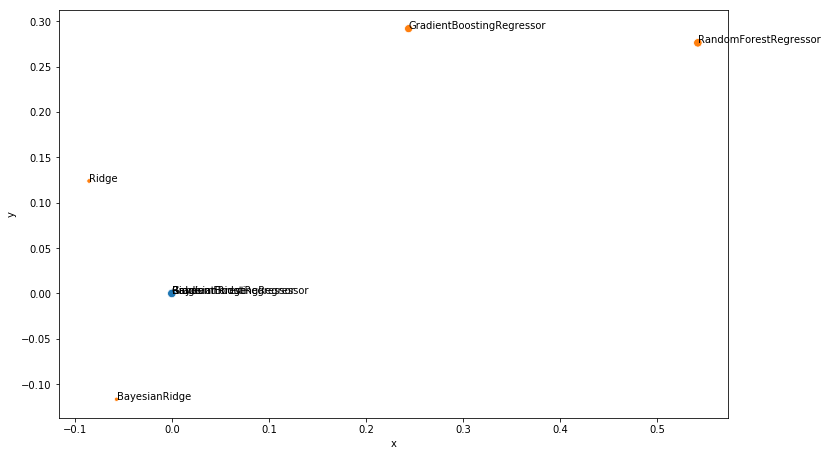

In [7]:
compare(estimators, train_X, train_y, train_X, train_y)
compare(estimators, train_X, train_y, test_X, test_y)

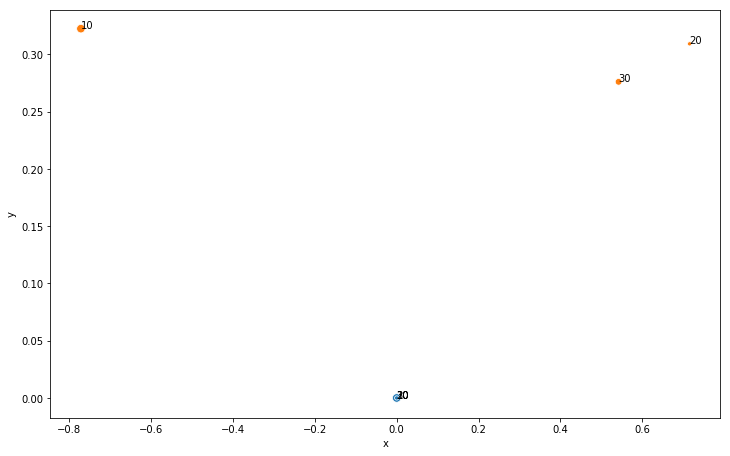

In [8]:
rfs = [
    RandomForestRegressor(n_estimators=30, random_state=0),
    RandomForestRegressor(n_estimators=20, random_state=0),
    RandomForestRegressor(n_estimators=10, random_state=0)
]

compare(rfs, train_X, train_y, train_X, train_y, ["30", "20", "10"])
compare(rfs, train_X, train_y, test_X, test_y, ["30", "20", "10"])

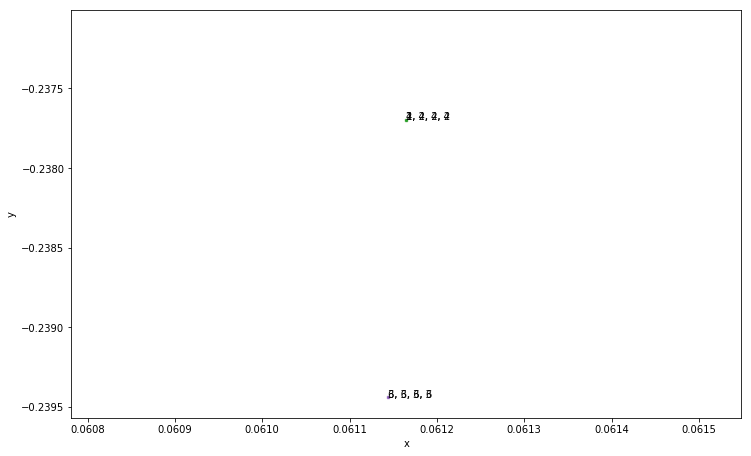

In [9]:
checker = [GradientBoostingRegressor(n_estimators=20, random_state=0)]

compare(
    checker, train_X, train_y, test_X, test_y, texts=["1"]
)
compare(
    checker, 2 * train_X, 2 * train_y, 2 * test_X, 2 * test_y,
    texts=["2, 2, 2, 2"]
)
compare(
    checker, 4 * train_X, 4 * train_y, 4 * test_X, 4 * test_y,
    texts=["4, 4, 4, 4"]
)
compare(
    checker, 3 * train_X, 3 * train_y, 3 * test_X, 3 * test_y,
    texts=["3, 3, 3, 3"]
)
compare(
    checker, 6 * train_X, 6 * train_y, 6 * test_X, 6 * test_y,
    texts=["6, 6, 6, 6"]
)

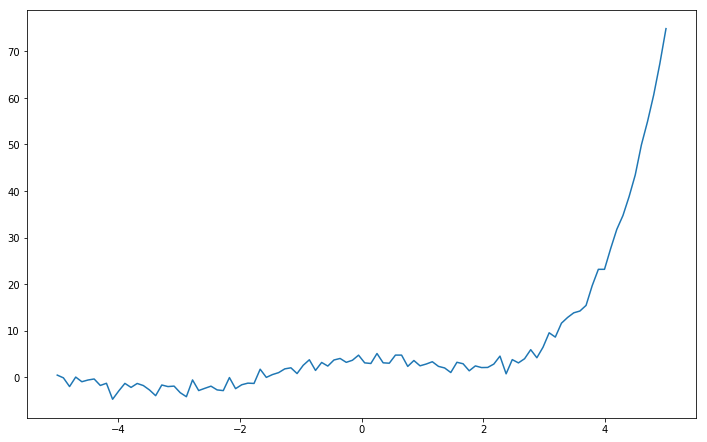

In [10]:
count = 100
space = np.linspace(-5, 5, count)

samples = np.hstack([
    np.cos(space),
    np.exp(space)
]).reshape(-1, 2)
target = 3 * np.cos(space) + np.exp(space) / 2 + np.random.randn(count)

synth_train_X, synth_test_X, synth_train_y, synth_test_y = \
    train_test_split(samples, target, test_size=0.45, random_state=0)
    
plt.plot(space, target);

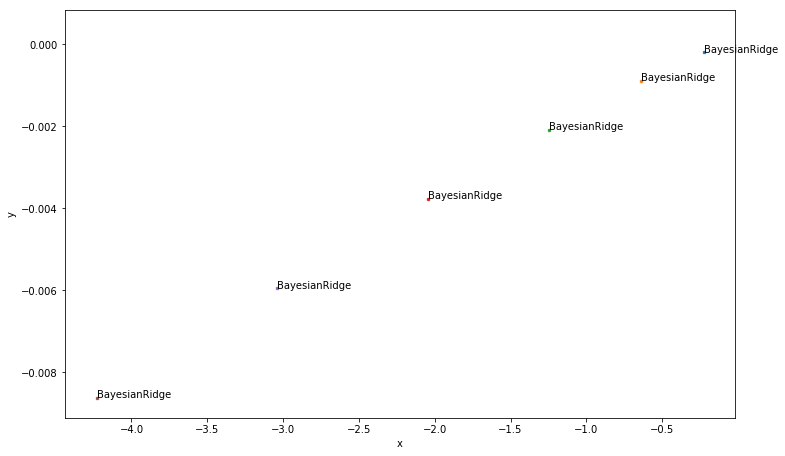

In [11]:
compare([BayesianRidge()],
        synth_train_X, synth_train_y, 1 * synth_test_X, 1 * synth_test_y
)
compare([BayesianRidge()],
        synth_train_X, synth_train_y, 2 * synth_test_X, 2 * synth_test_y
)
compare([BayesianRidge()],
        synth_train_X, synth_train_y, 3 * synth_test_X, 3 * synth_test_y
)
compare([BayesianRidge()],
        synth_train_X, synth_train_y, 4 * synth_test_X, 4 * synth_test_y
)
compare([BayesianRidge()],
        synth_train_X, synth_train_y, 5 * synth_test_X, 5 * synth_test_y
)
compare([BayesianRidge()],
        synth_train_X, synth_train_y, 6 * synth_test_X, 6 * synth_test_y
)

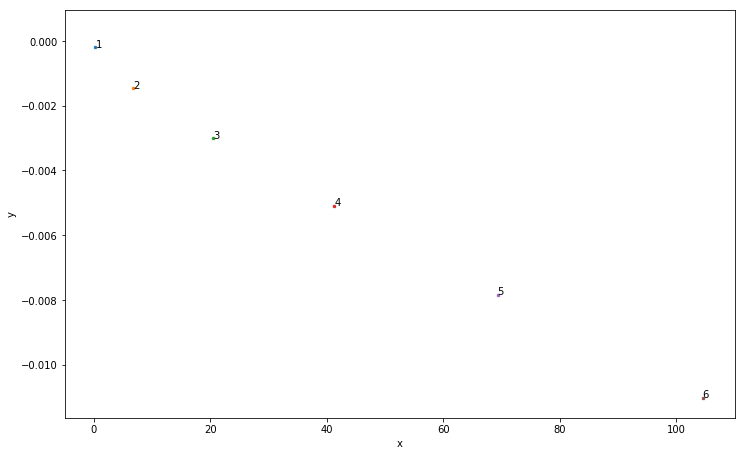

In [12]:
compare(
    [GradientBoostingRegressor(n_estimators=20, random_state=0)],
    synth_train_X, synth_train_y, 
    1 * synth_test_X, 1 * synth_test_y,
    texts=["1"]
)
compare(
    [GradientBoostingRegressor(n_estimators=20, random_state=0)],
    synth_train_X, synth_train_y, 
    2 * synth_test_X, 2 * synth_test_y,
    texts=["2"]
)
compare(
    [GradientBoostingRegressor(n_estimators=20, random_state=0)],
    synth_train_X, synth_train_y, 
    3 * synth_test_X, 3 * synth_test_y,
    texts=["3"]
)
compare(
    [GradientBoostingRegressor(n_estimators=20, random_state=0)],
    synth_train_X, synth_train_y, 
    4 * synth_test_X, 4 * synth_test_y,
    texts=["4"]
)
compare(
    [GradientBoostingRegressor(n_estimators=20, random_state=0)],
    synth_train_X, synth_train_y, 
    5 * synth_test_X, 5 * synth_test_y,
    texts=["5"]
)
compare(
    [GradientBoostingRegressor(n_estimators=20, random_state=0)],
    synth_train_X, synth_train_y, 
    6 * synth_test_X, 6 * synth_test_y,
    texts=["6"]
)

In [13]:
from sklearn.datasets import fetch_california_housing

data1 = load_boston()
frame1 = pd.DataFrame(data1.data, columns=data1.feature_names)
features1 = list(data1.feature_names)
frame1['target'] = data1.target

data2 = fetch_california_housing()
frame2 = pd.DataFrame(data2.data, columns=data2.feature_names)
features2 = list(data2.feature_names)
frame2['target'] = data2.target

frame2_sampled = frame2.sample(1000, random_state=0)

split1 = len(frame1) // 2
split2 = len(frame2_sampled) // 2

[['-7.4509825319634295' '7.072417939570565']]
[['-8.723977308885106' '8.595739875264817']]
[['-0.27939956329357246' '0.03643169327778512']]
[['0.4008080133574244' '0.00731842038758049']]


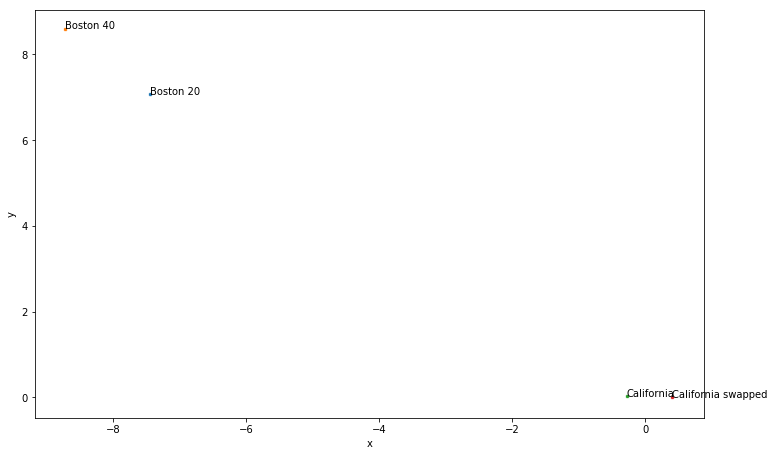

In [14]:
print(compare(
    [GradientBoostingRegressor(n_estimators=20, random_state=0)],
    frame1[features1][:split1].values,
    frame1.target[:split1].values, 
    frame1[features1][split1:].values,
    frame1.target[split1:].values,
    texts=['Boston 20'],
    return_vector=True
))

print(compare(
    [GradientBoostingRegressor(n_estimators=40, random_state=0)],
    frame1[features1][:split1].values,
    frame1.target[:split1].values, 
    frame1[features1][split1:].values,
    frame1.target[split1:].values,
    texts=['Boston 40'],
    return_vector=True
))

print(compare(
    [GradientBoostingRegressor(n_estimators=20, random_state=0)],
    frame2_sampled[features2][:split2].values,
    frame2_sampled.target[:split2].values, 
    frame2_sampled[features2][split2:].values,
    frame2_sampled.target[split2:].values,
    texts=['California'],
    return_vector=True
))

print(compare(
    [GradientBoostingRegressor(n_estimators=20, random_state=0)],
    frame2_sampled[features2][split2:].values,
    frame2_sampled.target[split2:].values, 
    frame2_sampled[features2][:split2].values,
    frame2_sampled.target[:split2].values,
    texts=['California swapped'],
    return_vector=True
))

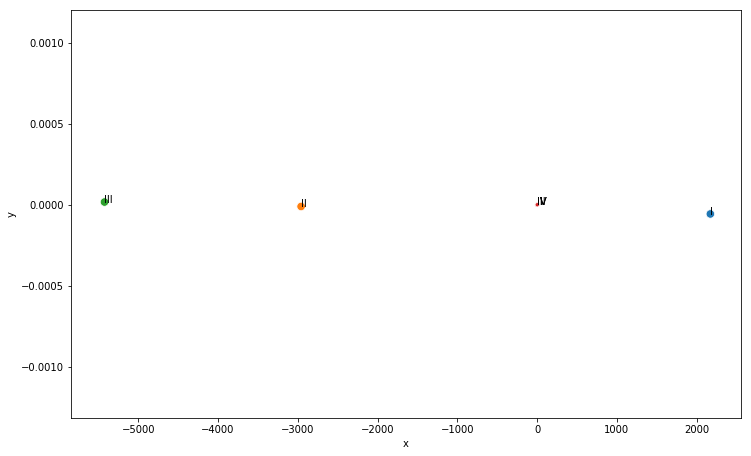

In [15]:
df = sns.load_dataset("anscombe")

for type_number in pd.unique(df['dataset']):
    dataset = df[df.dataset == type_number]
    size = 4 * len(dataset) // 10
    compare(
        [Ridge(), GradientBoostingRegressor()],
        dataset.x.values[:size].reshape(-1, 1), dataset.y[:size].values,
        dataset.x.values[size:].reshape(-1, 1), dataset.y[size:].values,
        texts=[type_number, type_number],
    )